# Wavelength Tests (Mainly PYPIT vs. LowRedux with LRISr)


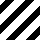
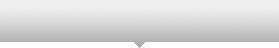
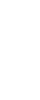
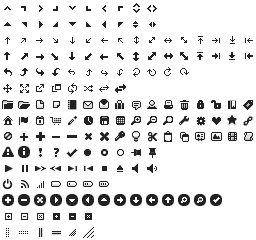
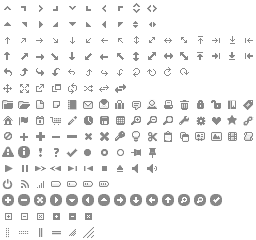
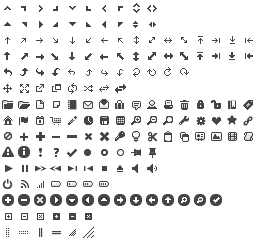
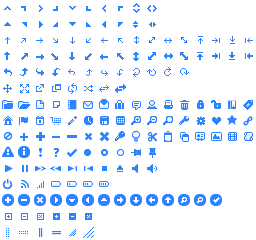
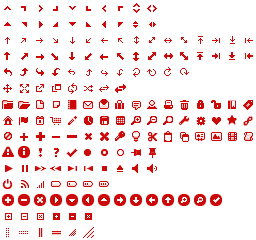
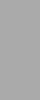
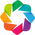
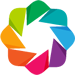
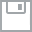
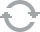
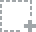
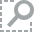
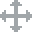
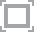
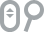

In [15]:
# imports
import matplotlib.gridspec as gridspec
from scipy.io import readsav
sys.path.append(os.path.abspath('/Users/xavier/local/Python/PYPIT/src/'))

from linetools import utils as ltu

import armsgs

import ardebug
debug = ardebug.init()
last_updated = "2 May 2016"
version = '0.1'
msgs = armsgs.get_logger((None, debug, last_updated, version, 1))
import arwave as arwv
import arutils

try:
    from xastropy.xutils import xdebug as debugger
except:
    import pdb as debugger
    

from bokeh.io import output_notebook, show, hplot, output_file
from bokeh.plotting import figure
from bokeh.models import Range1d

output_notebook()

## Compare LowRedux sky vs. Paranal

    -- Check sky spectrum
    in Good/
    sci = xmrdfits('sci-LR.20160216.40478.fits.gz',5)
    slitb = sci[1]
    paranal = skyspec_paranal(alog10(slitb.wave_opt))
    x_splot, slitb.wave_opt, slitb.sky_opt, ytwo=paranal*200

### Looks good basically everywhere

----

## Compare sky spectra (PYPIT vs. LowRedux)

In [4]:
# LowRedux
lr_file = '/Users/xavier/PYPIT/Tiffany/lris_red/LowRedux/Science/No_Flex/sci-LR.20160216.40478.fits.gz'
lr_hdu = fits.open(lr_file)
lr_slitb = Table(lr_hdu[5].data)[1]

In [5]:
# PYPIT
pyp_file = '/Users/xavier/PYPIT/Tiffany/lris_red/Science/spec1d_OFF_J1044p6306_LRISr_2016Feb16T112439.fits'
pyp_hdu = fits.open(pyp_file)
pyp_slitb = Table(pyp_hdu[5].data)

In [46]:
norm=15.
psky = figure(plot_width=800, plot_height=500, title="Sky Spectrum Comparison")
# LowRedux
psky.circle(lr_slitb['WAVE_BOX'], lr_slitb['SKY_BOX'], color='black', legend='LowRedux')
psky.line(lr_slitb['WAVE_BOX'], lr_slitb['SKY_BOX'], color='black', line_width=0.5)
# PYPIT
psky.circle(pyp_slitb['box_wave'], pyp_slitb['box_sky']*norm, color='red', legend='PYPIT')
psky.line(pyp_slitb['box_wave'], pyp_slitb['box_sky']*norm, color='red', line_width=0.5)
#
psky.xaxis.axis_label = "Wavelength"
psky.yaxis.axis_label = "Sky Counts"
#
psky.set(x_range=Range1d(5500.,8000))#, y_range=Range1d(0.,12000))
show(psky)

### These are too different

### Fixed tilts bug in PYPIT;  now aligned to within 0.5 pix

### Fixed another bug.  Now dead on!

----

## Compare arc spectrum (PYPIT vs. LowRedux)

### LowRedux
    Comparing wavelengths     
    restore, 'wave-LR.20160216.05529.sav', /verb
    wave = x_calcfit(findgen(2048), fitstr=xfit[1])
    airtovac, wave
    mwrfits, arc1d[*,1], 'LR_arc_spectrum_vac.fits', /create
    mwrfits, wave, 'LR_arc_spectrum_vac.fits'

In [27]:
# LowRedux
lr_wave_fil = '/Users/xavier/PYPIT/Tiffany/lris_red/LowRedux/LR_arc_spectrum_vac.fits'
hdu = fits.open(lr_wave_fil)
lr_wave = hdu[1].data
lr_arc = hdu[0].data
#debugger.xplot(lr_wave, lr_arc)

### PYPIT

In [28]:
# PYPIT
pyp_wave_fil = '/Users/xavier/PYPIT/Tiffany/lris_red/MasterFrames/MasterWaveSoln_01.json'
pyp_wvsoln = ltu.loadjson(pyp_wave_fil)
pyp_wvsoln.keys()

[u'function',
 u'ions',
 u'yrej',
 u'xnorm',
 u'fitc',
 u'mask',
 u'xrej',
 u'fmax',
 u'fmin',
 u'xfit',
 u'yfit',
 u'spec']

In [29]:
pyp_wave = arutils.func_val(pyp_wvsoln['fitc'], np.linspace(0.,1.,2048),
            pyp_wvsoln['function'], minv=pyp_wvsoln['fmin'], maxv=pyp_wvsoln['fmax'])
pyp_arc = np.array(pyp_wvsoln['spec'])
#debugger.xplot(pyp_wave, pyp_arc)

### Comparing...

In [45]:
parc = figure(plot_width=800, plot_height=500, title="Arc Spectrum Comparison")
# LowRedux
parc.circle(lr_wave, lr_arc, color='black', legend='LowRedux')
parc.line(lr_wave, lr_arc, color='black', line_width=0.5)
# PYPIT
parc.circle(pyp_wave, pyp_arc, color='red', legend='PYPIT')
parc.line(pyp_wave, pyp_arc, color='red', line_width=0.5)
#
pimg.xaxis.axis_label = "Row"
pimg.yaxis.axis_label = "Counts"
#psky.set(x_range=Range1d(5500.,8000))#, y_range=Range1d(0.,12000))
show(parc)

In [135]:
#debugger.xplot(lr_wave, lr_arc, xtwo=pyp_wave, ytwo=pyp_arc)

### Dead on!

## Compare Wavelength Images

In [37]:
#col = 100
#lr_off = 1024
col = 897  # Center of slit on 1st detector
lr_off = 0

In [38]:
# LowRedux
lr_wavei_fil = '/Users/xavier/PYPIT/Tiffany/lris_red/LowRedux/wave-LR.20160216.05529.fits'
lr_wvimg = fits.open(lr_wavei_fil)[0].data
lr_wvimg.shape

(2048, 2048)

In [39]:
lr_wvarr = arwv.airtovac(lr_wvimg[:,col+lr_off]*u.AA)

In [40]:
# PYPIT
pyp_wavei_fil = '/Users/xavier/PYPIT/Tiffany/lris_red/MasterFrames/MasterWave_01.fits'
pyp_wvimg = fits.open(pyp_wavei_fil)[0].data
pyp_wvimg.shape

(2048, 1024)

In [41]:
pyp_wvarr = pyp_wvimg[:,col]

In [44]:
pimg = figure(plot_width=800, plot_height=500, title="Wavelength Image")
# LowRedux
pimg.circle(np.arange(2048), lr_wvarr.value-pyp_wvarr, color='black', legend='LowRedux-PYPIT')
pimg.line(np.arange(2048), lr_wvarr.value-pyp_wvarr, color='black', line_width=0.5)
#
pimg.xaxis.axis_label = "Row"
pimg.yaxis.axis_label = "Delta Wavelength"
#psky.set(x_range=Range1d(5500.,8000))#, y_range=Range1d(0.,12000))
show(pimg)

In [141]:
#debugger.xplot(np.arange(2048), lr_wvarr, xtwo=np.arange(2048), ytwo=pyp_wvarr)
debugger.xplot(np.arange(2048), lr_wvarr-pyp_wvarr*u.AA)

### Now within 1Ang

### Now within 0.5Ang and only at the edges